# Import scpopcorn

In [ ]:
from scpopcorn import MergeSingleCell
from scpopcorn import SingleCellData              

# Unzip data files

In [2]:


import zipfile
zip_ref = zipfile.ZipFile("../Data/Mouse_Kidney/MouseKidney_Data.zip", 'r')
zip_ref.extractall("../Data/Mouse_Kidney/")
zip_ref.close()

# Read in scRNA-seq row counts data and ground truth cell labels

In [4]:
File1 = "../Data/Mouse_Kidney/GSE107585_Mouse_kidney_single_cell_seurat_data1.txt"
File2 = "../Data/Mouse_Kidney/GSE107585_Mouse_kidney_single_cell_GrouthTruth.txt"
Test1 = SingleCellData()
Test1.ReadData_SeuratFormat(File1)
Test1.ReadTurth(File2, 0, 1)

File3 = "../Data/Mouse_Kidney/GSE107585_Mouse_kidney_single_cell_seurat_data2.txt"
File4 = "../Data/Mouse_Kidney/GSE107585_Mouse_kidney_single_cell_GrouthTruth.txt"
Test2 = SingleCellData()
Test2.ReadData_SeuratFormat(File3)
Test2.ReadTurth(File4, 0, 1)

File5 = "../Data/Mouse_Kidney/GSE107585_Mouse_kidney_single_cell_seurat_data3.txt"
File6 = "../Data/Mouse_Kidney/GSE107585_Mouse_kidney_single_cell_GrouthTruth.txt"
Test3 = SingleCellData()
Test3.ReadData_SeuratFormat(File5)
Test3.ReadTurth(File6, 0, 1)

File5 = "../Data/Mouse_Kidney/GSE107585_Mouse_kidney_single_cell_seurat_data4.txt"
File6 = "../Data/Mouse_Kidney/GSE107585_Mouse_kidney_single_cell_GrouthTruth.txt"
Test4 = SingleCellData()
Test4.ReadData_SeuratFormat(File5)
Test4.ReadTurth(File6, 0, 1)

2943
None number is 0 
5060
None number is 0 
1383
None number is 0 
2704
None number is 0 


# Normlize scRNA-seq data & find Highly Variable Genes & log transform

In [5]:
Test1.Normalized_per_Cell()
Test1.FindHVG()
Test1.Log1P()

Test2.Normalized_per_Cell()
Test2.FindHVG()
Test2.Log1P()

Test3.Normalized_per_Cell()
Test3.FindHVG()
Test3.Log1P()

Test4.Normalized_per_Cell()
Test4.FindHVG()
Test4.Log1P()

/Users/wangy42/anaconda3/lib/python3.6/site-packages/scanpy/preprocessing/simple.py:359: RuntimeWarning: invalid value encountered in greater_equal
  gene_subset = df['dispersion_norm'].values >= disp_cut_off
/Users/wangy42/anaconda3/lib/python3.6/site-packages/scanpy/preprocessing/simple.py:359: RuntimeWarning: invalid value encountered in greater_equal
  gene_subset = df['dispersion_norm'].values >= disp_cut_off
/Users/wangy42/anaconda3/lib/python3.6/site-packages/scanpy/preprocessing/simple.py:359: RuntimeWarning: invalid value encountered in greater_equal
  gene_subset = df['dispersion_norm'].values >= disp_cut_off
/Users/wangy42/anaconda3/lib/python3.6/site-packages/scanpy/preprocessing/simple.py:359: RuntimeWarning: invalid value encountered in greater_equal
  gene_subset = df['dispersion_norm'].values >= disp_cut_off


# Combine datasets and set number of supercells for each dataset

In [6]:
NumSuperCell_Test1 = 100
NumSuperCell_Test2 = 100
NumSuperCell_Test3 = 100
NumSuperCell_Test4 = 100
MSingle = MergeSingleCell(Test1, Test2, Test3, Test4)
MSingle.MultiDefineSuperCell(NumSuperCell_Test1, NumSuperCell_Test2, NumSuperCell_Test3, NumSuperCell_Test4)

# Compute within dataset similairty and between dataset similarity

In [7]:
Mat_Center = MSingle.ConstructWithinSimiarlityMat_SuperCellLevel()
Mat_Between = MSingle.ConstructBetweenSimiarlityMat_SuperCellLevel()

16272
16272
16272
4881
4881
2579
16272
16272
16272
4881
4881
2341
16272
16272
16272
4881
4881
2398
16272
16272
16272
4881
4881
2417
16272
16272
16272
4881
4881
2630
16272
16272
16272
4881
4881
2599


# SDP solver

In [8]:
Estimate_NumCluster = 15 # initial guess of number of corresponding clusters, do not need to be accurate!!!
MSingle.SDP_NKcut(Estimate_NumCluster)

optimal value with SCS: 9.679013377267674


# Rounding & Automatically estimate number of clusters

In [9]:
NumCluster_Min = 3 
NumCluster_Max = 25
# PopCorn will screen number of cluster from NumCluster_Min to NumCluster_Max and find the best number of clusters
CResult = MSingle.NKcut_Rounding(NumCluster_Min, NumCluster_Max)

# Evaluation of clustering results if ground truth is provided

In [10]:
MSingle.Evaluation(CResult)

['15', '9', '11', '4', '3', '6', '12', '10', '5', '1', '13', '14', '8', '7', '2']
['16']
###########Corresponding Clusterin 0##########
>Dataset 0
Number of Cells: 124
0.806452% percentage of cells are 16
0.806452% percentage of cells are 13
7.258065% percentage of cells are 1
13.709677% percentage of cells are 15
77.419355% percentage of cells are 14
>Dataset 1
Number of Cells: 177
0.564972% percentage of cells are 10
3.389831% percentage of cells are 16
14.689266% percentage of cells are 15
30.508475% percentage of cells are 13
50.847458% percentage of cells are 14
>Dataset 2
Number of Cells: 199
26.130653% percentage of cells are 15
73.869347% percentage of cells are 14
>Dataset 3
Number of Cells: 459
0.217865% percentage of cells are 10
0.653595% percentage of cells are 16
18.082789% percentage of cells are 15
81.045752% percentage of cells are 14
common cluster is ['14']
###########Corresponding Clusterin 1##########
>Dataset 0
Number of Cells: 378
0.264550% percentage of cells ar

# Similairty between cells across datasets

In [11]:
MSingle.StatResult()

Similairty between cells across datasets of Cluster 0 is 4.678289
Similairty between cells across datasets of Cluster 1 is 4.660142
Similairty between cells across datasets of Cluster 2 is 4.528894
Similairty between cells across datasets of Cluster 3 is 4.747322
Similairty between cells across datasets of Cluster 4 is 7.459392
Similairty between cells across datasets of Cluster 5 is 5.129687
Similairty between cells across datasets of Cluster 6 is 4.934470
Similairty between cells across datasets of Cluster 7 is 5.095901
Similairty between cells across datasets of Cluster 8 is 5.501014
Similairty between cells across datasets of Cluster 9 is 5.352978
Similairty between cells across datasets of Cluster 10 is 5.259093
Similairty between cells across datasets of Cluster 11 is 5.301179
Similairty between cells across datasets of Cluster 12 is 2.429619
Similairty between cells across datasets of Cluster 13 is 5.521810
Similairty between cells across datasets of Cluster 14 is 2.111191
Simil

# Umap plots using the results generated by PopCorn

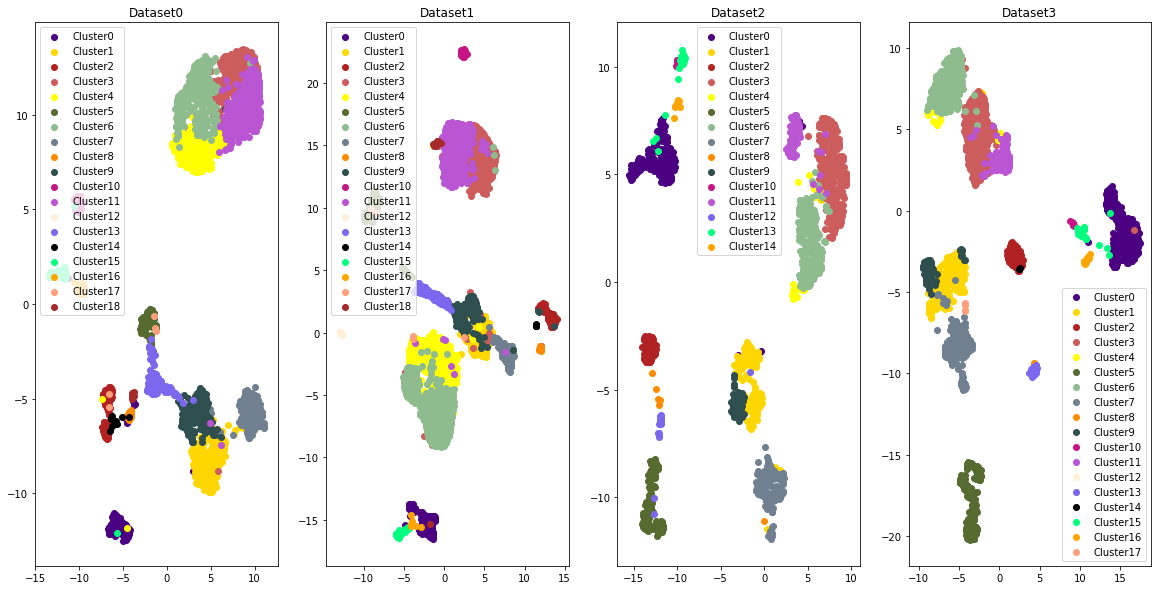

In [12]:
MSingle.Umap_Result()

# Output PopCorn results into a file

In [13]:
FileName = "PopCorn_Human_Mouse_Pan_Reprodcue_Result.txt"
MSingle.OutputResult(FileName)

[11 11 11 11 11  3  3 11  3 11  3  3  3  3  3  3  3 11 11 11  4  3  6  6
  6  6  6  6  6  4  4  4  6  6  4  4  4  4  4 10 10  0  0  0 16 15 15 15
  9  9  9  9  1  9  9  9 13  9  7  7  7  7  7  7  7  7  7  1  1  1  1  1
  1  1  1  1  2  2  2  2  2  2  2 13 13 13  7 13  8 18  0 14 12  0 17  5
 13  5  5  5  3  3  3  3  3  3  3  3  3  3  3  3  3  3 11 11 11 11 11 11
 11 11 11 14  8  0  0 18  2  6  6  6  6  6  6  6  1  4  4  4  4  4  4  4
  4  6  6  6  4  4  4  4  4  6  9  9  9  9  9  7  7  1  1  1  1  1  7  1
  7  9  5 17  5  5  5  5  5 13 13 13 13  2  2  2  2  2  2  2 16 15  0  0
  0  0  0 10 10 12 15 15  6  6  6  6  6  6  6 11 11 11 17 18 11  4 11  4
  6  3  3  3  3  3  3  3  3  3  3  3  8 13 13 13  5  5  5  5  5  5  7  7
  7  7  7  7  7  7  7  1  1  1  9  1  9  9  1  1  1  1  1  1  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2 10 15  0  0  0  0
 16 16  0 15  0  0 15  0  0  0  0  0 14  8  2  2  2  2  2  2  2  2  2  2
  0  0  0  0  0  0  0  0  0  0 10  0  0  0  0 15 16